<a href="https://colab.research.google.com/github/iakob12345/Wine-Project/blob/master/Wine_5_statistical_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research question:** 
Which country offers the best value wines for each wine type and price range?

#**Null Hypothesis**

**Null Hypothesis**: 
Wine origin country has no effect on the value proposition of wines.

**Alternative Hypothesis**:
Wine origin country has an effect on the value proposition of wines.

## **Variables**

### **Independent variable**: 'Country'



> *Examples:* (France, Germany, Spain, Italy, Chile, United States, Australia, etc)

### **Dependent variable**: 'Value' *(Rating divided by Price)*


> *Range:* (0.2 - 200)




### **Categories**: 'Category' *(Price category + Wine Type)*

> *Examples:* (White_Low, White_Medium, White_Premium, Red_Low, Red_Medium, etc)


We will be comparing the effects of wine origin countries across multiple different clusters.

# **Statistical Testing**

##Data Introduction

### Libraries imported

In [33]:
!pip install numpy_indexed
!pip install scikit_posthocs

import numpy as np
import pandas as pd
from scipy.stats import f
from scipy.stats import levene
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import scikit_posthocs as sp
%matplotlib inline 

from google.colab import drive
drive.mount('/content/drive/')
path='/content/drive/My Drive/Colab Notebooks/winedata_df_after_scaling_factor.pkl'

# read cvs in Pandas
winedata_df = pd.read_pickle(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Grouping the data for Statistical Testing**
We will group data so it was easier to work with below statistical tests.

In [34]:
#base grouping
wine_categories = winedata_df['category'].unique()
wine_categories = list(wine_categories)
wine_countries = winedata_df['country'].unique()

country_category_value_df = winedata_df[['country','category','value_scaled']]

In [73]:
#nested list in dictionary
#dictionary key represent categories and nested lists represent country samples' 'values' separately
values_per_category_nested_list = {}
for category in wine_categories:
  category = str(category)
  values_per_country_category = country_category_value_df[country_category_value_df['category'] == category][['country','value_scaled']]
  values_per_country_list = []
  for country in wine_countries:
    is_country = any(values_per_country_category['country'] == country)
    if is_country:
      values_per_country = values_per_country_category[values_per_country_category['country'] == country]['value_scaled']
      values_per_country = list(values_per_country)
      values_per_country_list.append(values_per_country)
      values_per_category_nested_list[category] = values_per_country_list
      
#examples
for n,k in enumerate(values_per_category_nested_list):
  if k == 'Sparkling-Luxury':
    print(k,':', values_per_category_nested_list[k])


Sparkling-Luxury : [[3.987782667775011, 3.6539807701724927, 3.7608333692237643, 3.5697684965982543, 3.423086221233785, 3.5448612178822536, 3.513819234848159, 3.7899559350518905, 3.6878072220327294, 3.6576893767447967, 3.6393793543597632, 3.626018579311846, 3.353391250154781, 3.4150890700748073, 3.2717136092610346, 3.1171915920626168, 3.058293096333186, 3.335196426566203, 3.0432761756427027, 2.8043497178539862, 3.067287824151095, 3.250573134061526, 3.057970778352563, 2.9651638511766207, 3.028569612559171, 3.0233651685911145, 3.004634696865917, 2.956418438070151, 2.8314302501370556, 2.964543779083231, 2.9239701266492877, 2.930235948512998, 3.513979952183447, 3.0480104839472495, 3.0171218333201035, 3.0221348975868425, 2.815196225184388, 2.8638991850453923, 2.7961946857499345, 2.73161463138352, 3.606871797562689, 3.105350057674917, 2.954547482048466, 2.840995085211941, 2.7735903087895064, 3.1930730512825147, 3.113392117355866, 3.398347504155783, 2.8854116496562896, 2.7964190395962105, 2.78

### Descriptive Statistics: Categories and Population groups 

In [36]:
category_country_agg = winedata_df.groupby(by=['category','country'])['value_scaled'].agg(count='count',mean='mean',std = 'std',min='min',max='max')

print(category_country_agg.to_string())

                                 count       mean        std        min         max
category          country                                                          
Dessert-Medium    France            67  22.225789   6.013230  12.816188   42.129449
Dessert-Premium   France           240   9.004832   3.432935   3.490668   17.788295
                  Italy             51  10.844402   3.050074   5.363916   17.408733
Red-Low           Argentina        114  47.132999  11.279431  31.668292   87.804849
                  Australia        130  43.552094  11.451260  27.945967   94.883576
                  Austria          101  39.666962   5.537852  29.413276   66.148324
                  Chile            329  44.603056   8.734730  30.071132   83.008685
                  France           890  44.040592   9.190848  27.193641   84.381157
                  Germany          127  43.063361  11.204202  29.783342   83.887539
                  Italy            875  48.196938  11.450796  26.782124  124

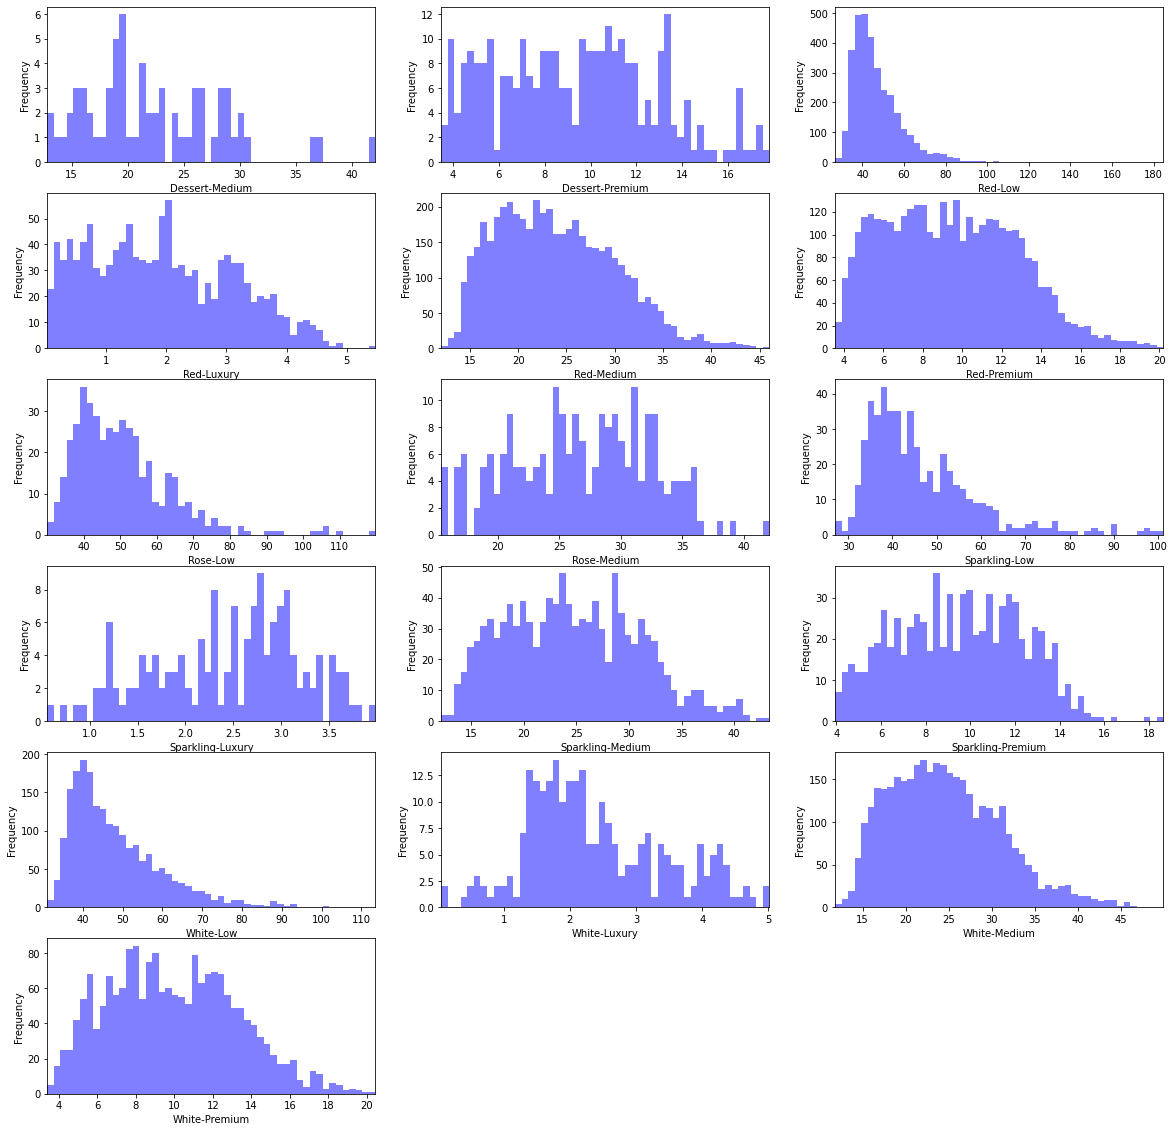

In [37]:
# Generically define how many plots along and across

df = winedata_df
categories = df.category.unique()
categories = list(categories)
categories.sort()

ncols = 3
nrows = int(np.ceil(len(categories) / (1.0*ncols)))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))


# Lazy counter so we can remove unwated axes
counter = 0
for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    # Plot when we have data
    if counter < len(categories):
      each_category = df[df['category'] == categories[counter]]['value_scaled']
      ax.hist(each_category, bins=50, color='blue', alpha=0.5, label='{}'.format(each_category))
      ax.set_xlabel(categories[counter])
      ax.set_ylabel('Frequency')
      #ax.set_ylim([0, 500])
      ax.set_xlim([min(each_category), max(each_category)])        
    # Remove axis when we no longer have data
    else:
      ax.set_axis_off()
    counter += 1

plt.show()

**Inference** 
<br>
Looking at the Frequency Histograms, we see that categories do not follow similar distributions: most are right-skewed,  some are uniformal and some are somewhat normally distributed. 

This is an important piece of information, because it will help us choose the most appropriate statistical method to work with. Also, the fact that right-skewed distributions are the most prevalent suggests us that low-value wines are the most frequent leading us to believe that knowing how to choose a bottle is an important skill! 🤓

## **Choosing the right test: Anova?**


Our initial choice of statistical test has been Parametric Comparison and particularly Anova since it allows comparison of more than 2 groups. For this, 3 main assumptions need to be tested first:

1) Independence of observations: this is already in place since we collected the data only once ✅

2) Homogeneity of variance: is needed to be tested ❓

3) Normality of data: is needed to be tested ❓

### Anova assumptions: Checking **Homogeneity Of Variance** using Levene's Test

**Levene's test** is a statistical procedure for testing equality of variances between two or more sample populations.
We are going to test if sample country populations have equality of variances inside their categories.



### Anova assumptions: Leneve test results and inferences

In [38]:
#parsing values to levene test
levene_p_values = {}

for category, value in values_per_category_nested_list.items():
  if len(value) > 1: #excluding categories that have only 1 country representation
    stat,p = levene(*value, )
    levene_p_values[category] = round(p,3)

In [39]:
results_leneve = pd.DataFrame.from_dict(levene_p_values, orient = 'index', columns=['P-Value'])
results_leneve

,P-Value
Red-Low,0.000
Rose-Low,0.037
White-Low,0.000
Sparkling-Low,0.017
White-Medium,0.000
Red-Medium,0.000
Sparkling-Medium,0.000
Rose-Medium,0.010
Sparkling-Premium,0.005
Red-Premium,0.000


**Low P-values (<0.05)** in Leneve's test represent that population groups **are not following equal variances** ❌. This however can be counterbalanced if the sample sizes are similar along the groups, which as we see from descriptive statistics, is not true as well ❌. Therefore, we will detour from our initial plan to run Anova tests and in opposite, will choose **non-parametric** tests where this 3 main assumptions are not needed to be in place. For this, we chose **kruskal's test**.

## **Kruskal–Wallis nonparametric tests**

### Introduction & Assumptions

The Kruskal-Wallis H test is a rank-based nonparametric test that can be used to determine if there are statistically significant differences between two or more groups of an independent variable on a dependent variable.

Kruskal's test has 3 main assumptions that I will quickly cover below how it fits to our case:
- Assumption #1: dependent variable should be measured at the ordinal or continuous level - True **✅**
- Assumption #2: independent variable should consist of two or more categorical, independent groups - True  **✅**
- Assumption #3: researcher should have independence of observations - True  **✅**

Therefore, we will be proceeding with this test below.

### Results and Inferences

In [40]:
#parsing category_category values to kruskal test
kruskal_p_values = {}

for category,value in values_per_category_nested_list.items():
  if len(value) > 1:
    stat,p = kruskal(*value)
    kruskal_p_values[category] = round(p,2)

kruskal_df = pd.DataFrame.from_dict(kruskal_p_values, orient = 'index', columns=['P-Value'])
kruskal_df

,P-Value
Red-Low,0.00
Rose-Low,0.00
White-Low,0.00
Sparkling-Low,0.09
White-Medium,0.00
Red-Medium,0.00
Sparkling-Medium,0.00
Rose-Medium,0.00
Sparkling-Premium,0.00
Red-Premium,0.00


The extremely low p-values showed that test indeed suggested statistically significant differneces between population group means inside categories. 
Categories that showed P-values more than 0.05 will be dropped.

In [41]:
winedata_df.shape

(24300, 23)

In [42]:
kruskal_high_p_categories = kruskal_df[kruskal_df['P-Value'] > 0.05].reset_index()
kruskal_high_p_categories = list(kruskal_high_p_categories['index'])

has_row_high_p = winedata_df['category'].isin(kruskal_high_p_categories)
winedata_df = winedata_df[~has_row_high_p]

In [43]:
winedata_df.shape

(23788, 23)

## **Post-Hoc analysis using Conover's Test**

### **Introduction**

From **Kruskal–Wallis** nonparametric tests we found out that there was a high statistical significance of different means for each category (except of 2 which were dropped). However, we were unable to understand between which country groups this relationship existed specifically for each category. For instance, we could not tell e.g. in category "Red-Low" (referring to red wine and low price category), whether we had statistically significant mean differences between France and Germany or France and Spain, or France and Italy, etc. To understand these relationships between groups, Post-Hoc analysis using **Conover's Test** will be performed.

### **Modeling**

In [44]:
def conover_signific_plots(category):
  try:
    category_df = winedata_df[winedata_df['category'] == category]
    pc = sp.posthoc_conover(category_df, val_col = 'value_scaled', group_col = 'country')
    heatmap_args = {'linewidths': 0.1, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
    sp.sign_plot(pc, **heatmap_args)
  except ZeroDivisionError:
    print('Only a single country was represented for this category.')

### **Results**

In [45]:
winedata_df.head()

,catalog,wine_type,winery,grape,harvest_year,country,region,price,price_category,rating_avg,count_reviews_per_wine,value_original,category,link,country_iso3,group,avg_revs_cat,std_revs_cat,Zscore_count_reviews_per_wine,Z_scaling_factor,R_Z_scaling_factor,value_scaled,difference_values
0,red_portugal,red,Bacalhôa,Alentejano Monte das Ânforas Tinto,2014,Portugal,Alentejano,1.85,Low,3.4,740,183.78,Red-Low,https://www.vivino.com/bacalhoa-vinhos-de-port...,PRT,Portugal-Red-Low,691.690859,2040.767690,0.023672,1.004701,3.415983,184.647716,0.867716
1,red_portugal,red,AR - Adega de Redondo,Porta Da Ravessa Alentejo Tinto,2017,Portugal,Alentejo,2.39,Low,3.4,1016,142.26,Red-Low,https://www.vivino.com/adega-cooperativa-de-re...,PRT,Portugal-Red-Low,691.690859,2040.767690,0.158915,1.030276,3.502938,146.566456,4.306456
2,red_portugal,red,AR - Adega de Redondo,Porta Da Ravessa Alentejo Tinto,2018,Portugal,Alentejo,2.39,Low,3.4,479,142.26,Red-Low,https://www.vivino.com/adega-cooperativa-de-re...,PRT,Portugal-Red-Low,691.690859,2040.767690,-0.104221,0.978503,3.326911,139.201282,-3.058718
3,Rose,rose,Canals & Nubiola,Rosado,No Year Detected,Spain,Catalunya,2.65,Low,2.9,360,109.43,Rose-Low,https://www.vivino.com/canals-and-nubiola-rosa...,ESP,Spain-Rose-Low,714.814318,1478.864241,-0.239924,0.948559,2.750822,103.804599,-5.625401
4,red_portugal,red,Alfacinha,Tinto,2018,Portugal,Lisboa,2.80,Low,3.5,385,125.00,Red-Low,https://www.vivino.com/alfacinha-tinto/w/68775...,PRT,Portugal-Red-Low,691.690859,2040.767690,-0.150282,0.968586,3.390052,121.073301,-3.926699


In [46]:
v = winedata_df.groupby(by=['category','country'])['value_scaled'].agg(counts='count', mean ='mean',median='median').round(0).reset_index()
print(v)

           category        country  counts  mean  median
0    Dessert-Medium         France      67  22.0    21.0
1   Dessert-Premium         France     240   9.0     9.0
2   Dessert-Premium          Italy      51  11.0    11.0
3           Red-Low      Argentina     114  47.0    45.0
4           Red-Low      Australia     130  44.0    40.0
..              ...            ...     ...   ...     ...
76    White-Premium        Germany     328  10.0    10.0
77    White-Premium          Italy     310  11.0    12.0
78    White-Premium       Portugal      65  12.0    12.0
79    White-Premium          Spain      76  12.0    12.0
80    White-Premium  United States     205  10.0     9.0

[81 rows x 5 columns]


####Category: Red-Low

All countries show statistically significant relationships with majority of other groups


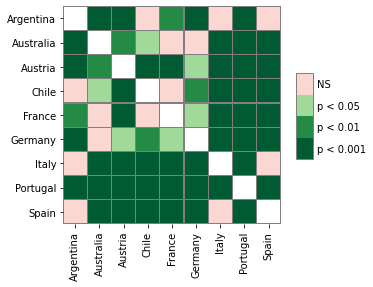

In [47]:
conover_signific_plots('Red-Low')
print("All countries show statistically significant relationships with majority of other groups")

####Category:Red-Medium

All countries show statistically significant relationships with majority of other groups


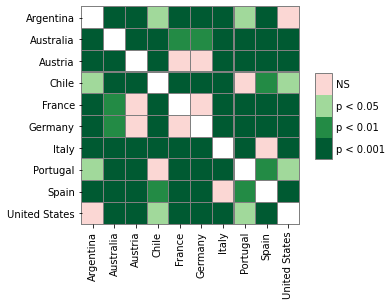

In [48]:
conover_signific_plots('Red-Medium')
print("All countries show statistically significant relationships with majority of other groups")

####Category:Red-Premium

Germany, Italy, Portugal, Spain, USA and Argentina do not show statistically significant relationships


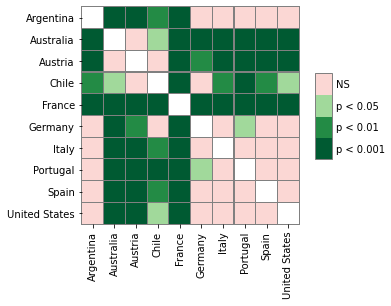

In [49]:
conover_signific_plots('Red-Premium')
print("Germany, Italy, Portugal, Spain, USA and Argentina do not show statistically significant relationships")

#### Category:Red-Luxury

No countries show statistically significant relationships with majority of other groups - whole category will be dropped


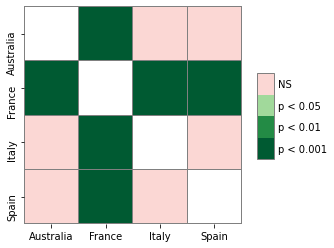

In [50]:
conover_signific_plots('Red-Luxury')
print("No countries show statistically significant relationships with majority of other groups - whole category will be dropped")

####Category:White-Low

All countries show statistically significant relationships with majority of other groups


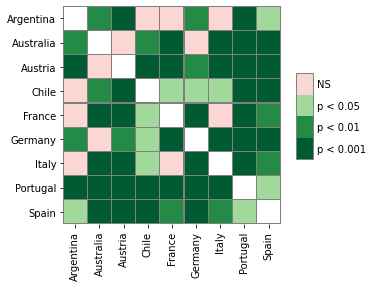

In [51]:
conover_signific_plots('White-Low')
print("All countries show statistically significant relationships with majority of other groups")

####Category:White-Medium

Except of USA, all countries show statistically significant relationships with majority of other groups


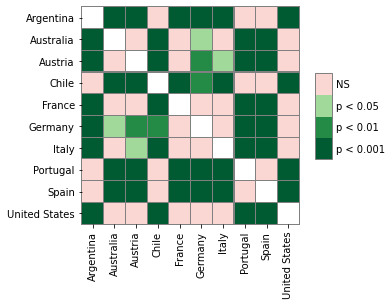

In [52]:
conover_signific_plots('White-Medium')
print("Except of USA, all countries show statistically significant relationships with majority of other groups")

####Category:White-Premium

All countries show statistically significant relationships with majority of other groups


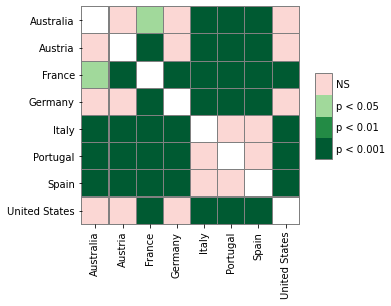

In [53]:
conover_signific_plots('White-Premium')
print("All countries show statistically significant relationships with majority of other groups")

####Category:White-Luxury

All countries show statistically significant relationships


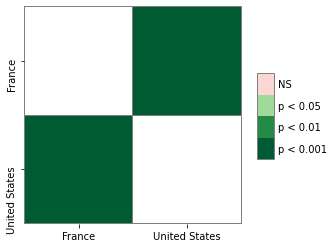

In [54]:
conover_signific_plots('White-Luxury')
print("All countries show statistically significant relationships")

####Category:Rose-Low

No countries show statistically significant relationships with majority of other groups - whole category will be dropped


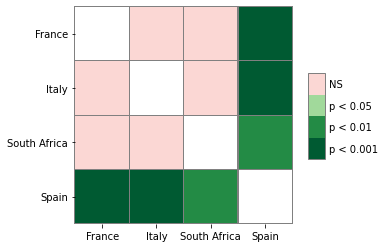

In [55]:
conover_signific_plots('Rose-Low')
print("No countries show statistically significant relationships with majority of other groups - whole category will be dropped")

####Category:Rose-Medium

Not enough competition - whole category will be dropped


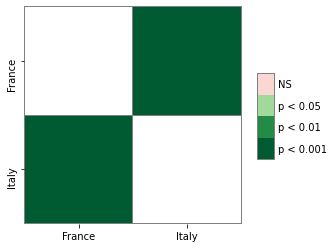

In [56]:
conover_signific_plots('Rose-Medium')
print("Not enough competition - whole category will be dropped")

#### Category:Rose-Luxury

In [57]:
conover_signific_plots('Rose-Luxury')

Only a single country was represented for this category.


####Category:Sparkling-Low

In [58]:
conover_signific_plots('Sparkling-Low')

Only a single country was represented for this category.


####Category:Sparkling-Medium

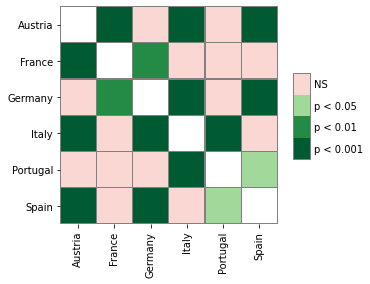

In [59]:
conover_signific_plots('Sparkling-Medium')

####Category:Sparkling-Premium

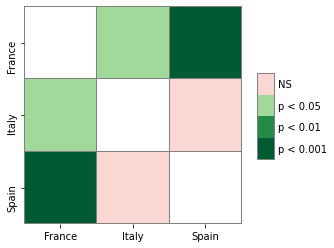

In [60]:
conover_signific_plots('Sparkling-Premium')

##**Inferences**

After running Kruskal's and Conover's tests, we will only keep those countries which showed statistically signifiant relationships with at least 50% of other countris (**P < 0.05**). Also, we will only keep those categories as a whole that had at least 3 statistically significant country relationships. This brings us to the following inferences:


> Categories (and their respective countries) that **passed** significance tests:
* Red - Low for All Countries
* Red - Medium for All Countries
* Red - Premium for All Countries **except Italy, Spain, Portugal, Germany, Argentina and USA**
* White - Low for All Countries
* White - Medium for All Countries **except USA**
* White - Premium for All Countries **except Australia**
* Sparkling  -  Medium for All Countries **except France and Portugal**

<br>

> Categories that were fully **dismissed** due to low significance levels:
* White - Luxury
* Red - Luxury
* Sparkling - Low
* Sparkling - Premium
* Sparkling - Luxury
* Rose - Low
* Rose - Medium
* Rose - Premium
* Rose - Luxury

### Filtering for Significance Tests and Saving

In [61]:
winedata_df.shape

(23788, 23)

In [62]:
categories_to_dismiss = ['White-Luxury','Red-Luxury','Sparkling-Low', 'Sparkling-Premium','Sparkling-Luxury','Rose-Low', 'Rose-Medium', 'Rose-Premium', 'Rose-Luxury','Dessert-Medium','Dessert-Premium']
groups_to_dismiss = ['France-Sparkling-Medium','France-Sparkling-Medium','Australia-White-Premium','Italy-Red-Premium','Germany-Red-Premium', 'Argentina-Red-Premium', 'Portugal-Red-Premium', 'Spain-Red-Premium', 'United States-White-Medium','United States-Red-Premium']

winedata_df = winedata_df[~winedata_df['category'].isin(categories_to_dismiss)]
winedata_df = winedata_df[~winedata_df['group'].isin(groups_to_dismiss)]


winedata_df.shape

(18518, 23)

###Saving 

In [63]:
tested_df = winedata_df
tested_df.to_pickle('/content/drive/My Drive/Colab Notebooks/winedata_df_after_statistically_significant_tests.pkl')